# Sentiment WordCloud Example

## Intro

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from dotenv import load_dotenv


In [3]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

from helixirapi.helixir_api import HelixirApi

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

### Create client instance

In [4]:
load_dotenv()
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirApi(auth_token=AUTH_TOKEN)
client

## Get Messages

Select which methods should be used. We can also set other arguments such as `from_` or an optional `tag`.

In [5]:
methods = [
    "get_discord",
    "get_publications",
    "get_reddit",
    "get_telegram",
    "get_twitter",
]
kwargs = {
    "from_": "2022-06-06",
    "limit": 500,
    "tag": "ada", # optional argument
}

messages = []
for method in methods:
    response = getattr(client, method)(**kwargs)
    attr_name = "content" if method != "get_publications" else "text"
    messages += [getattr(m, attr_name) for m in response]

print(f"Number of messages: {len(messages)}.")

Number of messages: 1446.


In [6]:
text = "; ".join(messages)
print(f"Length of the all messages {len(text)}.")

Length of the all messages 698828.


## Create WordCloud

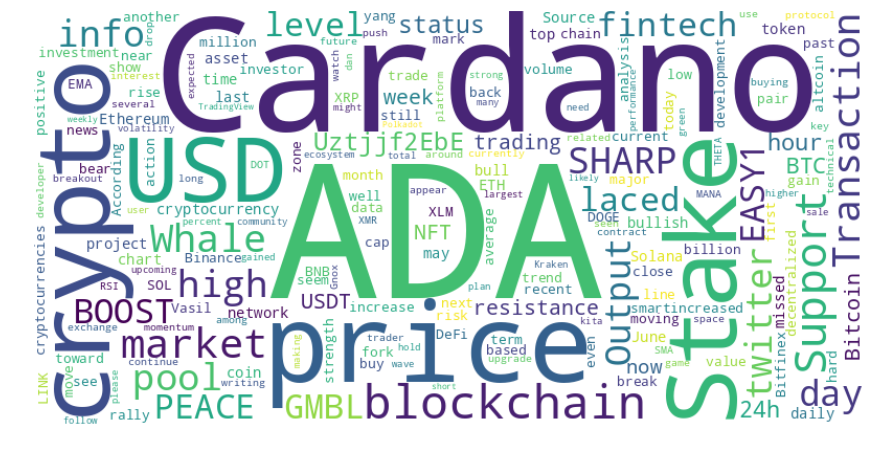

In [7]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["will", "make", "one", "said", "https", "year", "new"])

# Generate a word cloud image
wordcloud = WordCloud(
    stopwords = stopwords,
    min_word_length = 3,
    collocations = False,
    background_color = "white",
    width=800, height=400,
).generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("images/wordcloud.png")
plt.show()